# Recommenders Assignments

## 1. Content-Based Filtering: Cosine Similarity

In [2]:
# 1. Read in the data from the first tab of the Movie Ratings spreadsheet, which contains genre labels
import pandas as pd
df = pd.read_excel("../Data/Movie_Ratings.xlsx")
df.head()

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [81]:
# 2. Remove the non-genre columns of the movie genre data
genre_df= df.set_index('Movie_Title').drop(['Movie_ID'], axis=1)
genre_df.index.name=None
genre_df.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [9]:
# 3. Calculate the cosine similarity of Toy Story (1995) and Get Shorty (1995)
df2=genre_df.loc[['Toy Story (1995)','Get Shorty (1995)']]
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
np.set_printoptions(linewidth=np.inf) #to set the array in a line and prevent wrapping
cs=cosine_similarity(df2)
cs

array([[1.        , 0.33333333],
       [0.33333333, 1.        ]])

In [10]:
cs_df=pd.DataFrame(cs,index=df2.index, columns=df2.index)
cs_df

,Toy Story (1995),Get Shorty (1995)
Toy Story (1995),1.000000,0.333333
Get Shorty (1995),0.333333,1.000000


In [12]:
# 4. Calculate the cosine similarity of Toy Story (1995) compared with all the movies
cs2=cosine_similarity(genre_df)
cs2

array([[1.        , 0.        , 0.        , ..., 0.        , 0.57735027, 0.        ],
       [0.        , 1.        , 0.57735027, ..., 0.        , 0.        , 0.        ],
       [0.        , 0.57735027, 1.        , ..., 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        , 0.70710678],
       [0.57735027, 0.        , 0.        , ..., 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        , 1.        ]])

In [14]:
cs_df2=pd.DataFrame(cs2,index=genre_df.index, columns=genre_df.index)
cs_df2.head()

,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
Toy Story (1995),1.000000,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.666667,0.00000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.57735,0.00000
GoldenEye (1995),0.000000,1.000000,0.57735,0.333333,0.333333,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.816497,0.00000,0.00000,0.00000,0.00000,0.00000,0.408248,0.000000,0.00000,0.00000
Four Rooms (1995),0.000000,0.577350,1.00000,0.000000,0.577350,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.707107,0.00000,0.00000,0.00000,0.00000,0.00000,0.707107,0.000000,0.00000,0.00000
Get Shorty (1995),0.333333,0.333333,0.00000,1.000000,0.333333,0.57735,0.408248,0.666667,0.57735,0.408248,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.000000,0.408248,0.57735,0.57735
Copycat (1995),0.000000,0.333333,0.57735,0.333333,1.000000,0.57735,0.408248,0.333333,0.57735,0.408248,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.408248,0.408248,0.00000,0.57735


In [16]:
# 5. Return the top 5 movies with the highest cosine similarity
# put the content based filtering in a function

def content_recommendation(content_name,cos_sim_model):
    
    return cos_sim_model[[content_name]].sort_values(by=content_name,ascending=False)

In [19]:
content_recommendation('Toy Story (1995)',cs_df2).head(6)

,Toy Story (1995)
Toy Story (1995),1.000000
Aladdin and the King of Thieves (1996),1.000000
Aladdin (1992),0.866025
"Goofy Movie, A (1995)",0.866025
Jungle2Jungle (1997),0.816497
Angels in the Outfield (1994),0.816497


## 2. User-Item Matrix

In [20]:
# 1. Read in the movies, users and ratings tabs of the spreadsheet into three DataFrames
movies_df = pd.read_excel("../Data/Movie_Ratings.xlsx")
movies_df.head()

,Movie_ID,Movie_Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [21]:
user_df = pd.read_excel("../Data/Movie_Ratings.xlsx",sheet_name=1)
user_df.head()

,User_ID,Age,Gender,Occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [22]:
rating_df = pd.read_excel("../Data/Movie_Ratings.xlsx",sheet_name=2)
rating_df.head()

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [24]:
# 2. Use .pivot to restructure the ratings data into a user-item matrix
rating_pivot =rating_df.pivot(index='User_ID',columns='Movie_ID', values='Rating')
rating_pivot.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#replace missing valuewith the mean
x=rating_pivot.fillna(rating_df['Rating'].mean()).round(1)
x.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User_ID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
2,4.0,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,2.0,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
3,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
4,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
5,4.0,3.0,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5


## 3. TruncatedSVD

In [28]:
# 1. Apply TruncatedSVD to the user-item matrix from the last assignment
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components= 2)
svd.fit(x)

TruncatedSVD()

In [29]:
# 2. View the user-item matrix and the shape of the user-item matrix
x.shape

(943, 1682)

In [30]:
# 3. View the U matrix and the shape of the U matrix
# U (user x latent features)
U = svd.transform(x)
U_df=pd.DataFrame(U)
U_df.head()

,0,1
0,144.371836,5.752410
1,143.874501,-0.936178
2,142.609810,-1.536343
3,144.021871,-1.558908
4,140.910449,1.214845


In [31]:
U_df.shape

(943, 2)

In [32]:
# 4. View the VT matrix and the shape of the VT matrix
#V-transpose
Vt =svd.components_
Vt

array([[ 0.02564069,  0.02409099,  0.02406081, ...,  0.02435253,  0.02435995,  0.02435986],
       [ 0.07808895, -0.00794639, -0.01712777, ..., -0.0030129 , -0.00392636, -0.00371181]])

In [33]:
Vt_df=pd.DataFrame(Vt, columns=x.columns)
Vt_df

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.025641,0.024091,0.024061,0.024447,0.024243,0.024382,0.025238,0.025173,0.025247,0.024586,...,0.024360,0.024367,0.02436,0.024352,0.024360,0.024345,0.024360,0.024353,0.024360,0.024360
1,0.078089,-0.007946,-0.017128,0.040954,-0.013596,-0.005169,0.069230,0.067476,0.064689,0.004615,...,-0.003538,-0.002987,-0.00366,-0.004206,-0.003547,-0.002764,-0.003262,-0.003013,-0.003926,-0.003712


In [34]:
Vt_df.shape

(2, 1682)

## 4. Choosing the Number of Components

In [38]:
# 1. Fit a TruncatedSVD model with 500 components
svd_500 = TruncatedSVD(n_components= 500)
svd_500.fit(x)

TruncatedSVD(n_components=500)

In [42]:
# 2. Plot the cumulative explained variance ratios
import numpy as np
EVR_500=svd_500.explained_variance_ratio_
EVR_500_cumsum= np.cumsum(EVR_500).round(2)
EVR_500_cumsum

array([0.03, 0.06, 0.09, 0.12, 0.13, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.21, 0.22, 0.23, 0.24, 0.24, 0.25, 0.26, 0.26, 0.27, 0.27, 0.28, 0.29, 0.29, 0.3 , 0.3 , 0.31, 0.31, 0.32, 0.32, 0.33, 0.33, 0.34, 0.34, 0.35, 0.35, 0.36, 0.36, 0.37, 0.37, 0.38, 0.38, 0.39, 0.39, 0.4 , 0.4 , 0.4 , 0.41, 0.41, 0.42, 0.42, 0.42, 0.43, 0.43, 0.44, 0.44, 0.44, 0.45, 0.45, 0.46, 0.46, 0.46, 0.47, 0.47, 0.47, 0.48, 0.48, 0.49, 0.49, 0.49, 0.5 , 0.5 , 0.5 , 0.51, 0.51, 0.51, 0.52, 0.52, 0.52, 0.53, 0.53, 0.53, 0.53, 0.54, 0.54, 0.54, 0.55, 0.55, 0.55, 0.56, 0.56, 0.56, 0.56, 0.57, 0.57, 0.57, 0.58, 0.58, 0.58, 0.58, 0.59, 0.59, 0.59, 0.59, 0.6 , 0.6 , 0.6 , 0.6 , 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.63, 0.63, 0.64, 0.64, 0.64, 0.64, 0.65, 0.65, 0.65, 0.65, 0.66, 0.66, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.67, 0.67, 0.68, 0.68, 0.68, 0.68, 0.68, 0.69, 0.69, 0.69, 0.69, 0.69, 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.71, 0.71, 0.71, 0.71, 0.71, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.7

In [64]:
x_df=pd.DataFrame(EVR_500_cumsum, index=range(1,501), columns=['cumsum']).head(250)
x_df

,cumsum
1,0.03
2,0.06
3,0.09
4,0.12
5,0.13
...,...
246,0.84
247,0.84
248,0.84
249,0.84


''

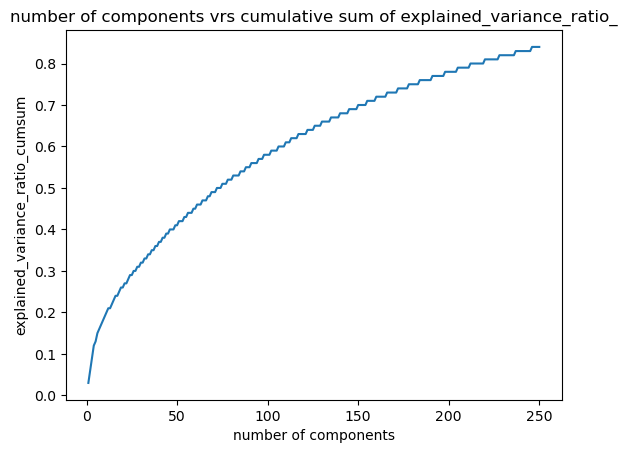

In [65]:
import matplotlib.pyplot as plt

x_df.plot(kind='line',
      xlabel='number of components',
      ylabel='explained_variance_ratio_cumsum',
      title='number of components vrs cumulative sum of explained_variance_ratio_', legend=False)
;

### 3. Suggest a “good” number of components that best captures the info in the data set
### use n_cluster =250 because it shows about 84%



In [75]:
# 4. Fit another TruncatedSVD model with the “good” number of components
svd_250 = TruncatedSVD(n_components= 250)
svd_250.fit(x)

TruncatedSVD(n_components=250)

In [69]:
sum(svd_250.explained_variance_ratio_)

0.8385426733699683

## 5. Making Collaborative Filtering Recommendations

In [71]:
# 1. View the new user vector
import pandas as pd
import numpy as np

# read in the movies tab of the spreadsheet
movies = pd.read_excel('../Data/Movie_Ratings.xlsx')

# read in the ratings tab
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx', sheet_name=2)

# use .pivot to restructure the ratings data into a user-item matrix
X = (ratings.pivot(index='User_ID', columns='Movie_ID', values='Rating').fillna(3))

# create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.NaN)

# populate with 5 ratings
ratings = [5, 3, 5, 5, 4]
positions_to_populate = [11, 14, 28, 63, 66]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=movies.Movie_Title)
new_user_df

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# view only the movies that the new user rated
new_user_df.T.dropna()

,0
Movie_Title,
"Usual Suspects, The (1995)",5.0
Mr. Holland's Opus (1995),3.0
Batman Forever (1995),5.0
"Shawshank Redemption, The (1994)",5.0
Ace Ventura: Pet Detective (1994),4.0


In [76]:
# 2. Transform the user into the latent space using .transform()
new_user_2d=svd_250.transform(new_user_df.fillna(3))


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


In [78]:
# 3. Reconstruct the user-item matrix for the user using np.dot()
VT_250=svd_250.components_ #model recommendation
VT_250

array([[ 0.02564069,  0.02409099,  0.02406081, ...,  0.02435253,  0.02435995,  0.02435986],
       [ 0.07811414, -0.00793499, -0.01713807, ..., -0.00300943, -0.00392326, -0.00370888],
       [ 0.09111569,  0.03993662,  0.03867619, ..., -0.0041548 , -0.00339563, -0.00301322],
       ...,
       [ 0.01095243,  0.03245719, -0.02447706, ..., -0.00523831, -0.00156674, -0.00333686],
       [ 0.05769967,  0.02775122, -0.01298786, ...,  0.00309078,  0.00134392, -0.00172569],
       [ 0.02459063,  0.00782687,  0.07617464, ...,  0.0001285 , -0.00230819,  0.00032825]])

In [80]:
new_user_recs=np.dot(new_user_2d,VT_250)
new_user_recs

array([[3.00173413, 3.1030136 , 3.02075375, ..., 3.00561385, 3.00658223, 3.0048504 ]])

In [92]:
# 4. Make 10 movie recommendations for the user
new_user_recs_df=pd.DataFrame(new_user_recs,columns=movies.Movie_Title)
new_user_recs_sort=new_user_recs_df.T.sort_values(by=0,ascending=False).head(10)
new_user_recs_sort.index.name=None
new_user_recs_sort.columns=['Recommendations']
new_user_recs_sort

,Recommendations
"Shawshank Redemption, The (1994)",4.334108
"Usual Suspects, The (1995)",4.307219
Batman Forever (1995),3.783694
Ace Ventura: Pet Detective (1994),3.455984
Happy Gilmore (1996),3.208659
"Silence of the Lambs, The (1991)",3.198254
Mortal Kombat (1995),3.192277
Schindler's List (1993),3.190550
Tommy Boy (1995),3.188254
Reservoir Dogs (1992),3.187606


In [93]:

already_rated=new_user_df.T.dropna().index
already_rated

Index(['Usual Suspects, The (1995)', 'Mr. Holland's Opus (1995)',
       'Batman Forever (1995)', 'Shawshank Redemption, The (1994)',
       'Ace Ventura: Pet Detective (1994)'],
      dtype='object', name='Movie_Title')

In [94]:
new_user_recs_sort[~new_user_recs_sort.index.isin(already_rated)]

,Recommendations
Happy Gilmore (1996),3.208659
"Silence of the Lambs, The (1991)",3.198254
Mortal Kombat (1995),3.192277
Schindler's List (1993),3.190550
Tommy Boy (1995),3.188254
Reservoir Dogs (1992),3.187606


In [ ]:
# 5. Review the movies and determine if they make sense

In [22]:
# 6. Optional: Try playing around with the number of components to see the difference in movie recommendations
